In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('../DATA/solvay_conference.jpg')

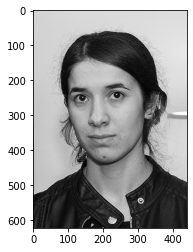

In [4]:
plt.imshow(nadia, cmap='gray')

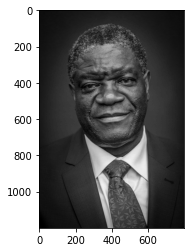

In [5]:
plt.imshow(denis, cmap='gray')

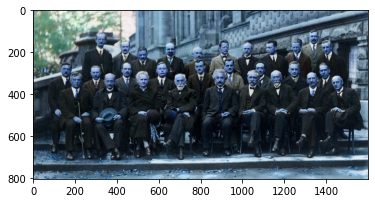

In [6]:
plt.imshow(solvay, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [11]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return face_img

In [12]:
result = detect_face(denis)

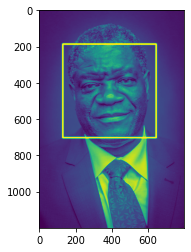

In [13]:
plt.imshow(result)

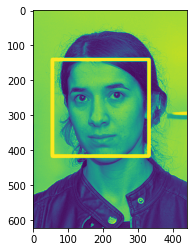

In [15]:
result = detect_face(nadia)
plt.imshow(result)

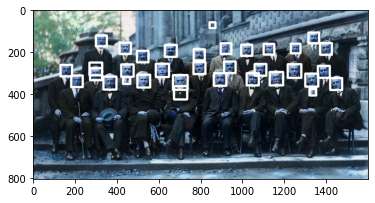

In [16]:
result = detect_face(solvay)
plt.imshow(result)

In [17]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return face_img

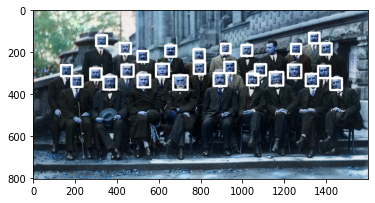

In [18]:
result = adj_detect_face(solvay)
plt.imshow(result)

## Eye Cascade

In [19]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [21]:
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img)

    for (x, y, w, h) in eyes_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return face_img

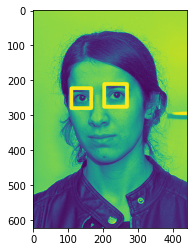

In [23]:
result = detect_eyes(nadia)
plt.imshow(result)

In [24]:
def adj_detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in eyes_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return face_img

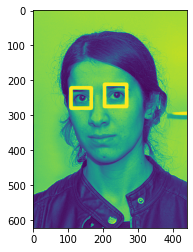

In [25]:
result = adj_detect_eyes(nadia)
plt.imshow(result)

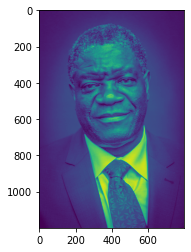

In [26]:
result = detect_eyes(denis)
plt.imshow(result)

In [27]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read(0)

    frame = detect_face(frame)

    cv2.imshow('Video Face Detection', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()